In [1]:
from fastai.vision import *

In [2]:
folder_list = ['baseball', 'cricket']

In [5]:
path= Path()
path.resolve()

PosixPath('/home/ubuntu/bb_r_cric')

In [10]:
urls_dir = path/'urls'


In [6]:
def mkdirectories(folder_list,path):
    for x in range(len(folder_list)):
        folder = folder_list[x]
        
        dest = path/folder
        dest.mkdir(parents=True, exist_ok=True)

In [7]:
mkdirectories(folder_list, path)

In [8]:
def downloader(urls_dir,folder_list,path):
    for idx,urls_path in enumerate(sorted(urls_dir.iterdir())):
      
        folder = folder_list[idx]
        dest = path/folder
        download_images(urls_path, dest, max_pics=300,max_workers=5, timeout=5)

In [11]:
downloader(urls_dir, folder_list, path)

In [12]:
for x in folder_list:
    verify_images(path/x, delete=True, max_workers=8)

In [13]:
classes = folder_list.copy()

In [14]:
np.random.seed(123)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

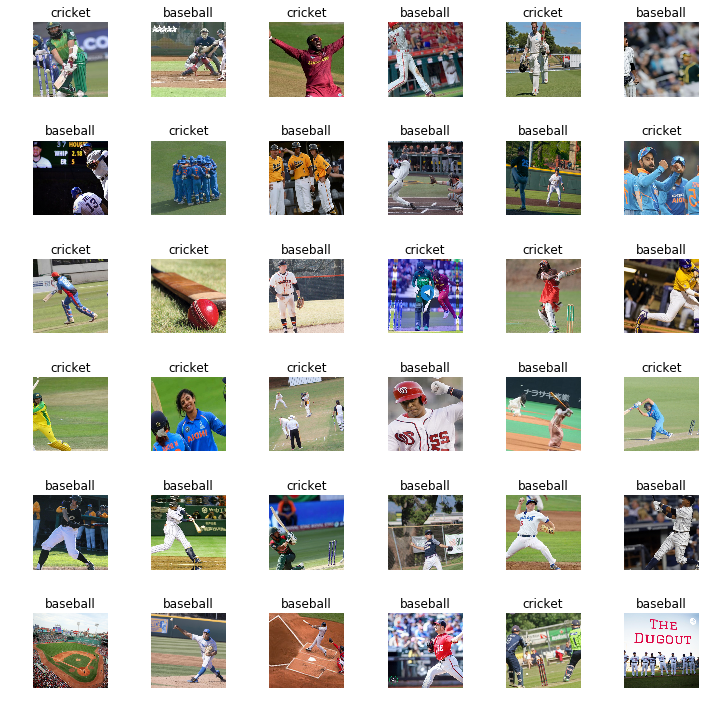

In [15]:
data.show_batch(rows=6, figsize=(10,10))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baseball', 'cricket'], 2, 435, 108)

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [18]:
learn.fit_one_cycle(4)

In [19]:
learn.save('stage-1')

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses)== len(idxs)

True

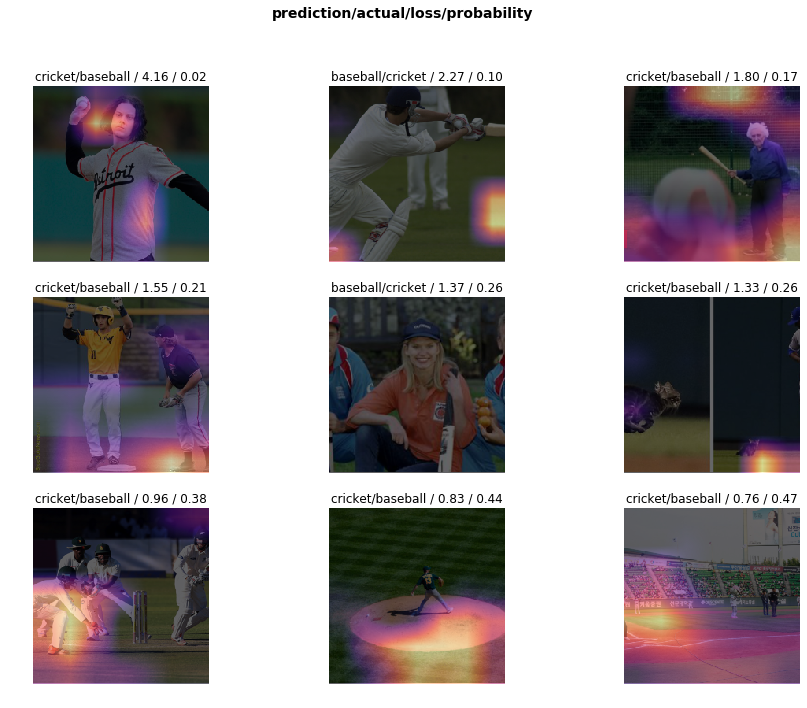

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

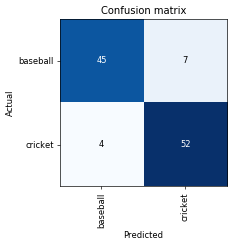

In [22]:
interp.plot_confusion_matrix(figsize=(4,4), dpi =60)

In [23]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(1)

In [25]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (435 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
baseball,baseball,baseball,baseball,baseball
Path: .;

Valid: LabelList (108 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cricket,baseball,baseball,baseball,cricket
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


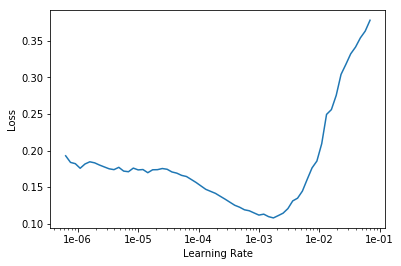

In [28]:
learn.recorder.plot()

In [29]:
learn.unfreeze()

In [30]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-2))

In [31]:
learn.save('stage-2(5,2)')

In [32]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (435 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
baseball,baseball,baseball,baseball,baseball
Path: .;

Valid: LabelList (108 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cricket,baseball,baseball,baseball,cricket
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-2))

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses)== len(idxs)

True

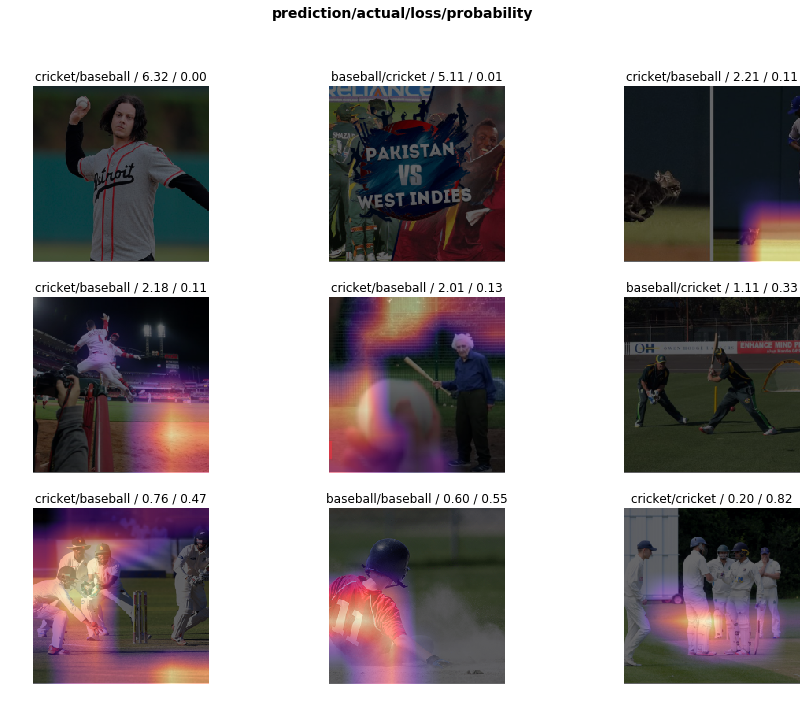

In [36]:
interp.plot_top_losses(9, figsize=(15,11))

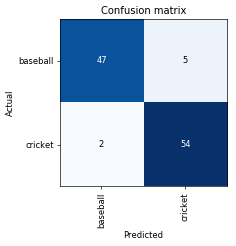

In [37]:
interp.plot_confusion_matrix(figsize=(4,4), dpi =60)

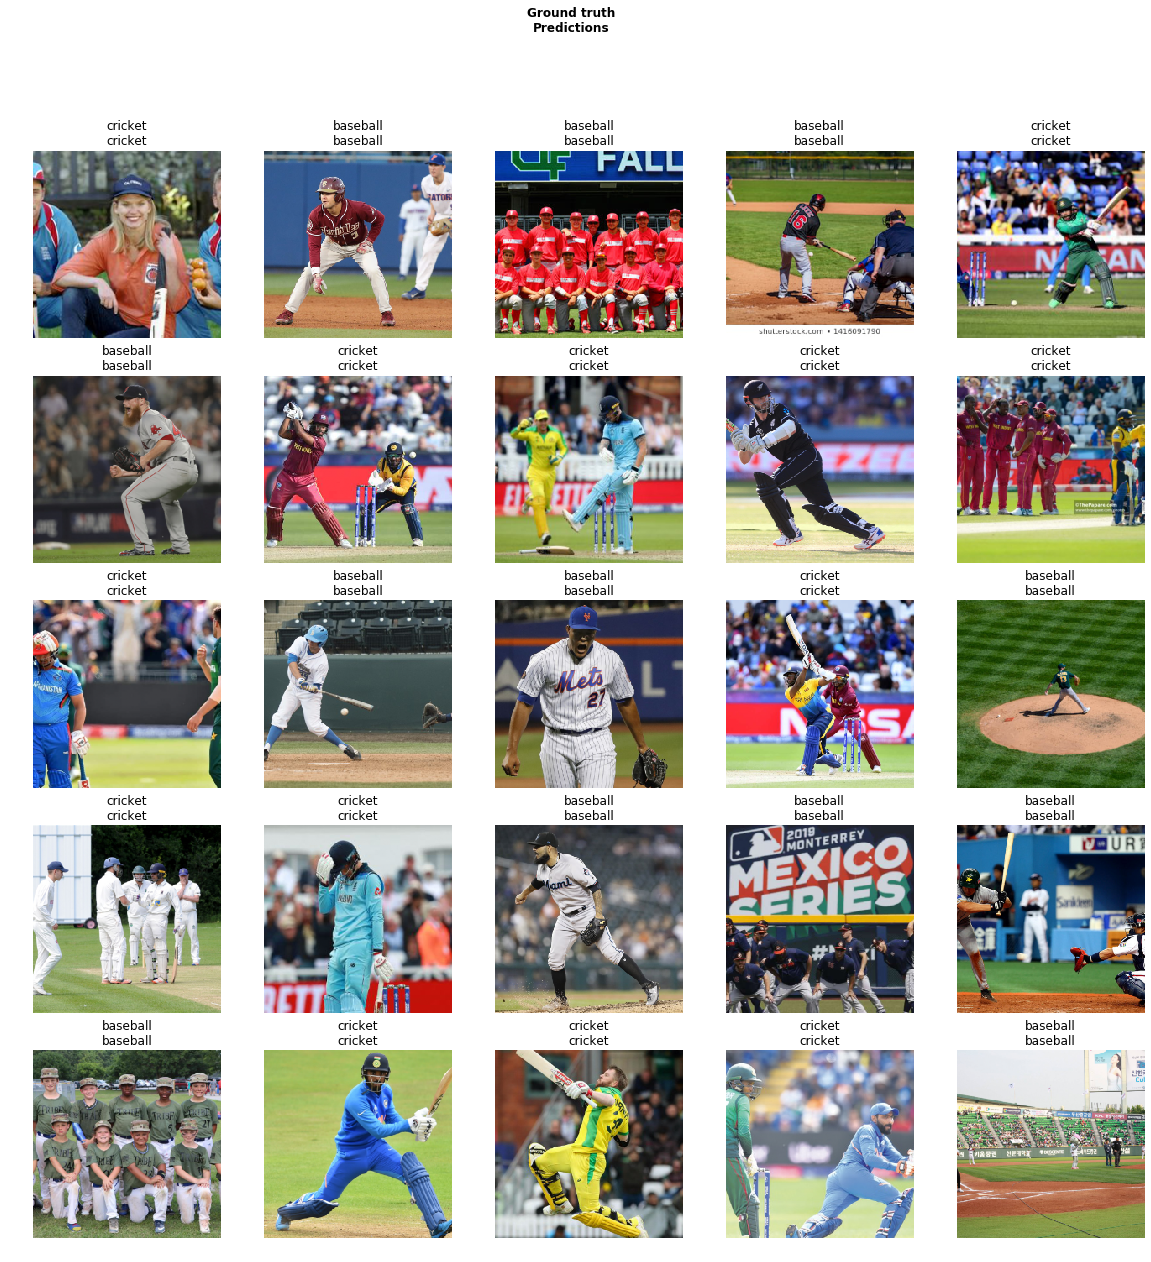

In [39]:
learn.show_results()